# The Premier League Home Invasion

In [58]:
import pandas as pd

df = pd.read_csv("premier_league_merged.csv")

df

C:\Users\Owner\AppData\Local\Temp\ipykernel_8804\3317907759.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("premier_league_merged.csv")


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Season
0,E0,1993-08-14,NaN,Arsenal,Coventry,0.0,3.0,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994
1,E0,1993-08-14,NaN,West Ham,Wimbledon,0.0,2.0,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994
2,E0,1993-08-14,NaN,Southampton,Everton,0.0,2.0,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994
3,E0,1993-08-14,NaN,Sheffield United,Swindon,3.0,1.0,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994
4,E0,1993-08-14,NaN,Oldham,Ipswich,0.0,3.0,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12319,E0,2025-05-25,16:00,Fulham,Man City,0.0,2.0,A,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025
12320,E0,2025-05-25,16:00,Bournemouth,Leicester,2.0,0.0,H,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025
12321,E0,2025-05-25,16:00,Wolves,Brentford,1.0,1.0,D,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025
12322,E0,2025-05-25,16:00,Ipswich,West Ham,1.0,3.0,A,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025


In [59]:
# Group by season and get multiple stats
season_stats = df.groupby('Season').agg({
    'FTHG': ['mean'],  # Average home goals
    'FTAG': ['mean'],  # Average away goals
})

# Access the columns and create the difference
season_stats["diff"] = season_stats[("FTHG", "mean")] - season_stats[("FTAG", "mean")]

season_stats

,FTHG,FTAG,diff
,mean,mean,
Season,,,
1994,1.435065,1.151515,0.283550
1995,1.508658,1.077922,0.430736
1996,1.526316,1.073684,0.452632
1997,1.471053,1.081579,0.389474
1998,1.557895,1.123684,0.434211
1999,1.455263,1.068421,0.386842
2000,1.671053,1.118421,0.552632
2001,1.544737,1.065789,0.478947


In [60]:
season_stats = season_stats[season_stats.index != 2021]
from scipy import stats

# Calculate goal difference for each match
df['goal_diff'] = df['FTHG'] - df['FTAG']

# Split by season
recent_season = df[df['Season'] == 2025]['goal_diff']
historical_seasons = df[df['Season'] < 2025]['goal_diff']

# Two-sample t-test
t_stat, p_value = stats.ttest_ind(historical_seasons, recent_season)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

T-statistic: 3.037, P-value: 0.002


In [61]:
df_2025 = df[df["Season"] == 2025]

# Home performance (goals scored at home vs conceded at home)
home_performance = df_2025.groupby('HomeTeam').agg({
    'FTHG': 'mean',  # Goals scored at home
    'FTAG': 'mean'   # Goals conceded at home
}).rename(columns={'FTHG': 'home_goals_for', 'FTAG': 'home_goals_against'})

# Away performance (goals scored away vs conceded away)  
away_performance = df_2025.groupby('AwayTeam').agg({
    'FTAG': 'mean',  # Goals scored away
    'FTHG': 'mean'   # Goals conceded away
}).rename(columns={'FTAG': 'away_goals_for', 'FTHG': 'away_goals_against'})

# Combine (make sure team names align)
team_stats = home_performance.join(away_performance, how='outer')

# Keep your current approach as home_adv_diff
team_stats['home_adv_diff'] = (team_stats['home_goals_for'] - team_stats['home_goals_against']) - \
                              (team_stats['away_goals_for'] - team_stats['away_goals_against'])
team_stats['home_adv_goals_for'] = team_stats['home_goals_for'] - team_stats['away_goals_for']
team_stats['home_adv_goals_against'] = team_stats['home_goals_against'] - team_stats['away_goals_against']

# Sort by overall home advantage
team_stats.sort_values('home_adv_diff', ascending=False)

,home_goals_for,home_goals_against,away_goals_for,away_goals_against,home_adv_diff,home_adv_goals_for,home_adv_goals_against
HomeTeam,,,,,,,
Aston Villa,1.789474,1.052632,1.263158,1.631579,1.105263,0.526316,-0.578947
Newcastle,2.105263,1.052632,1.473684,1.421053,1.000000,0.631579,-0.368421
Chelsea,1.842105,0.947368,1.526316,1.315789,0.684211,0.315789,-0.368421
Man City,2.263158,1.210526,1.526316,1.105263,0.631579,0.736842,0.105263
Leicester,0.789474,1.789474,0.947368,2.421053,0.473684,-0.157895,-0.631579
Nott'm Forest,1.368421,0.842105,1.684211,1.578947,0.421053,-0.315789,-0.736842
Everton,1.368421,1.210526,0.842105,1.105263,0.421053,0.526316,0.105263
Liverpool,2.210526,0.842105,2.315789,1.315789,0.368421,-0.105263,-0.473684
Wolves,1.421053,1.684211,1.421053,1.947368,0.263158,0.000000,-0.263158


Season Summary Statistics:
Historical average home advantage: 0.376
Latest season (2025) home advantage: 0.092
Decline from historical average: 0.284

Top 5 seasons by home advantage:
         FTHG   FTAG  goal_diff
Season                         
2010    1.697  1.074      0.623
2000    1.671  1.118      0.553
2001    1.545  1.066      0.479
2007    1.453  0.997      0.456
1996    1.526  1.074      0.452

Bottom 5 seasons by home advantage:
         FTHG   FTAG  goal_diff
Season                         
2021    1.353  1.342      0.011
2025    1.513  1.421      0.092
2022    1.513  1.305      0.208
1994    1.435  1.152      0.283
2016    1.492  1.208      0.284


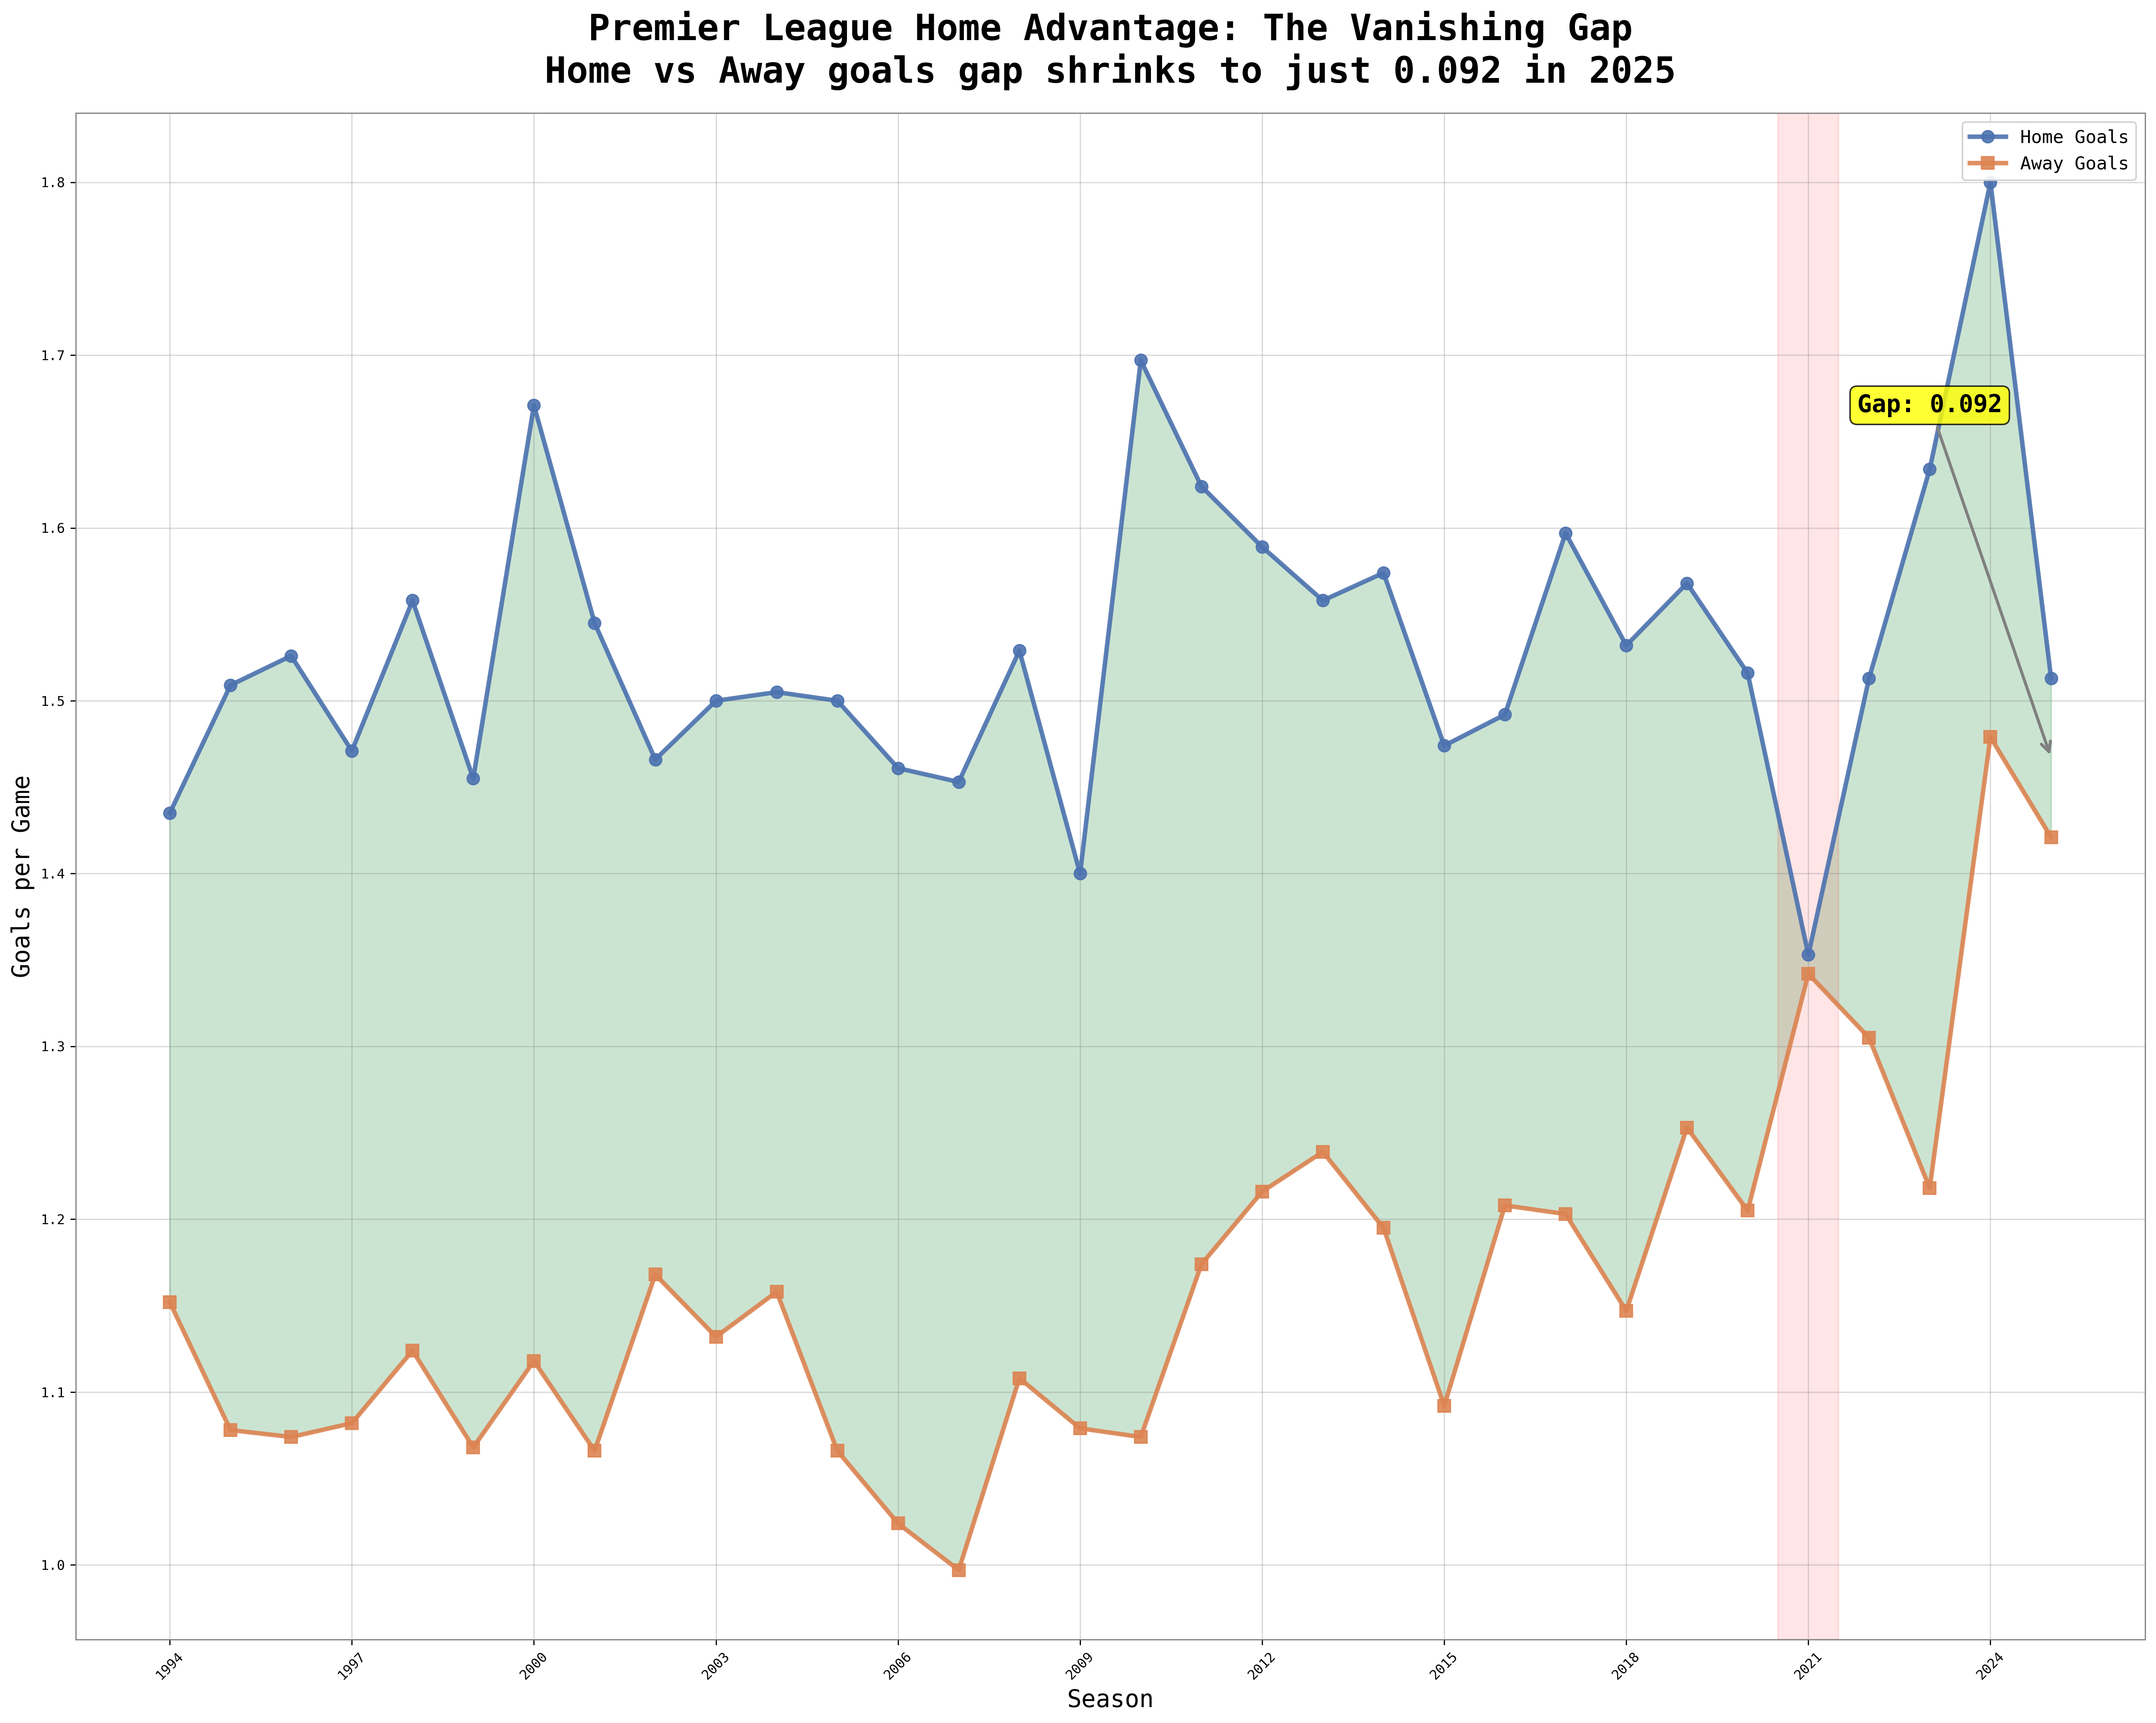

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
from style_config import StyleConfig

# Apply consistent styling
StyleConfig.apply_style()

def create_home_advantage_trend(df):
    """
    Create a line chart showing home goals, away goals, and difference per season
    """
    # Calculate season stats
    season_stats = df.groupby('Season').agg({
        'FTHG': 'mean',  # Home goals
        'FTAG': 'mean',  # Away goals
    }).round(3)
    
    # Calculate difference
    season_stats['goal_diff'] = season_stats['FTHG'] - season_stats['FTAG']
    
    # Create the plot
    fig, ax = plt.subplots(figsize=StyleConfig.PLOT['figure_size'])
    
    # Get color palette
    colors = StyleConfig.get_color_palette(3)
    
    # Plot lines
    home_line = ax.plot(season_stats.index, season_stats['FTHG'], 
                       color=colors[0], linewidth=3, marker='o', markersize=8, 
                       label='Home Goals', alpha=StyleConfig.PLOT['alpha'])
    
    away_line = ax.plot(season_stats.index, season_stats['FTAG'], 
                       color=colors[1], linewidth=3, marker='s', markersize=8, 
                       label='Away Goals', alpha=StyleConfig.PLOT['alpha'])
    
    # Fill the area between home and away goals to show home advantage
    ax.fill_between(season_stats.index, 
                   season_stats['FTHG'], 
                   season_stats['FTAG'],
                   alpha=0.3, 
                   color=colors[2])  # Removed label
    
    # Highlight 2024-25 season with annotation showing the tiny gap
    latest_season = season_stats.index.max()
    latest_diff = season_stats.loc[latest_season, 'goal_diff']
    latest_home = season_stats.loc[latest_season, 'FTHG']
    latest_away = season_stats.loc[latest_season, 'FTAG']
    
    # Add annotation pointing to the gap
    midpoint = (latest_home + latest_away) / 2
    ax.annotate(f'Gap: {latest_diff:.3f}', 
                xy=(latest_season, midpoint),
                xytext=(latest_season - 2, midpoint + 0.2),
                fontsize=StyleConfig.FONTS['label_size'],
                fontweight='bold',
                ha='center',
                bbox=dict(boxstyle="round,pad=0.3", 
                         facecolor='yellow', alpha=0.8),
                arrowprops=dict(arrowstyle='->', 
                              color=StyleConfig.COLORS['arrow_color'], 
                              lw=2))
    
    # Add horizontal line at zero for reference
    ax.axhline(y=0, color=StyleConfig.COLORS['grid_color'], 
               linestyle='--', alpha=0.5, linewidth=1)
    
    # Styling
    ax.set_xlabel('Season', fontsize=StyleConfig.FONTS['label_size'], 
                  color=StyleConfig.COLORS['text_color'])
    ax.set_ylabel('Goals per Game', fontsize=StyleConfig.FONTS['label_size'],
                  color=StyleConfig.COLORS['text_color'])
    ax.set_title('Premier League Home Advantage: The Vanishing Gap\n' + 
                 f'Home vs Away goals gap shrinks to just {latest_diff:.3f} in {latest_season}',
                 fontsize=StyleConfig.FONTS['title_size'], 
                 color=StyleConfig.COLORS['text_color'],
                 pad=20, fontweight='bold')
    
    # Grid
    ax.grid(True, alpha=0.3, color=StyleConfig.COLORS['grid_color'])
    
    # Legend
    ax.legend(fontsize=StyleConfig.FONTS['legend_size'],
              title_fontsize=StyleConfig.FONTS['legend_title_size'],
              loc='upper right', framealpha=0.9)
    
    # Spines
    for spine in ax.spines.values():
        spine.set_color(StyleConfig.COLORS['axis_color'])
        spine.set_linewidth(StyleConfig.PLOT['line_width'])
    
    # Tick parameters
    ax.tick_params(colors=StyleConfig.COLORS['text_color'], 
                   labelsize=StyleConfig.FONTS['text_size'])
    
    # Set x-axis to show every few years for readability with 0 decimal places
    seasons = season_stats.index
    tick_spacing = max(1, len(seasons) // 10)  # Show ~10 ticks
    ax.set_xticks(seasons[::tick_spacing])
    ax.set_xticklabels([f'{int(season)}' for season in seasons[::tick_spacing]], rotation=45)
    
    # Set tight y-axis limits based on data range
    y_min = min(season_stats['FTAG'].min(), season_stats['FTHG'].min())
    y_max = max(season_stats['FTAG'].max(), season_stats['FTHG'].max())
    y_padding = (y_max - y_min) * 0.05  # 5% padding
    ax.set_ylim(y_min - y_padding, y_max + y_padding)
    
    # Add subtle background highlight for COVID season if present
    if 2021 in season_stats.index:
        ax.axvspan(2020.5, 2021.5, alpha=0.1, color='red', 
                   label='COVID Season (Empty Stadiums)')
    
    plt.tight_layout()
    
    # Print summary stats
    print("Season Summary Statistics:")
    print("=" * 50)
    print(f"Historical average home advantage: {season_stats['goal_diff'][:-1].mean():.3f}")
    print(f"Latest season ({latest_season}) home advantage: {latest_diff:.3f}")
    print(f"Decline from historical average: {season_stats['goal_diff'][:-1].mean() - latest_diff:.3f}")
    print("\nTop 5 seasons by home advantage:")
    print(season_stats.nlargest(5, 'goal_diff')[['FTHG', 'FTAG', 'goal_diff']])
    print("\nBottom 5 seasons by home advantage:")
    print(season_stats.nsmallest(5, 'goal_diff')[['FTHG', 'FTAG', 'goal_diff']])
    
    return fig, ax, season_stats

# Usage:
fig, ax, stats = create_home_advantage_trend(df)
plt.show()
# 
# # Save the plot
# fig.savefig('premier_league_home_advantage_trend.png', 
#             dpi=StyleConfig.PLOT['dpi'], bbox_inches='tight')